In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Suicides in India 2001-2012.csv')

# Check the first few rows to understand the structure of the dataset
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


Total number of suicides in each year:  Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


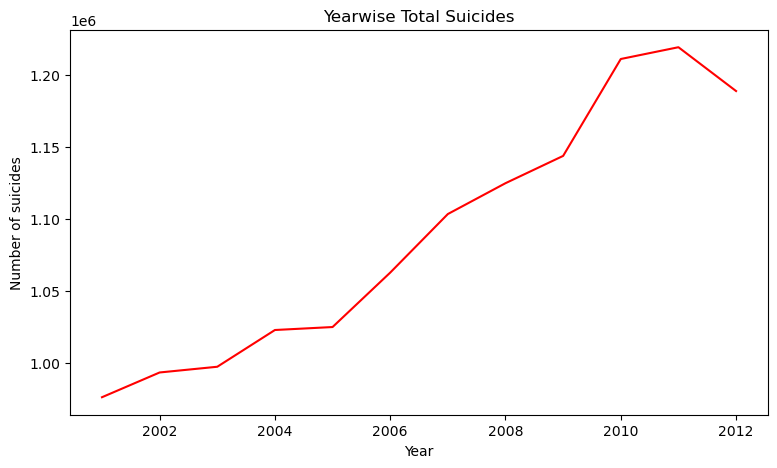

In [4]:
yearwise_total_suicide = df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

## Q2. Statewise Number Of Suicides  - use bar graph

Total number of suicides in each State :  State
A & N Islands           8109
Andhra Pradesh        814059
Arunachal Pradesh       6633
Assam                 172276
Bihar                  46214
Chandigarh              5164
Chhattisgarh          302354
D & N Haveli            3430
Daman & Diu             1391
Delhi (Ut)             84272
Goa                    17363
Gujarat               330858
Haryana               147176
Himachal Pradesh       26562
Jammu & Kashmir        14821
Jharkhand              49720
Karnataka             734825
Kerala                538946
Lakshadweep               50
Madhya Pradesh        451535
Maharashtra           901945
Manipur                 2102
Meghalaya               5415
Mizoram                 4154
Nagaland                1728
Odisha                267234
Puducherry             32144
Punjab                 46350
Rajasthan             255134
Sikkim                  9606
Tamil Nadu            818691
Total (All India)    2911862
Total (States)       285

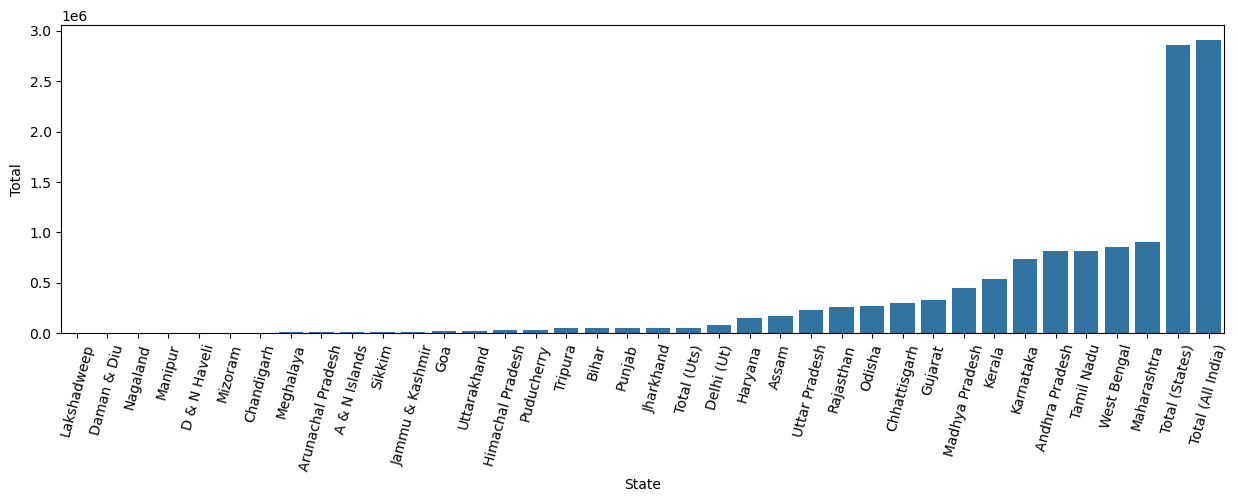

In [9]:
statewise_total_suicide = df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)

#plotting the above data
filter_state = pd.DataFrame(statewise_total_suicide.reset_index()) 
sort_state = filter_state.sort_values('Total',ascending = True)
f, ax = plt.subplots(figsize=(15, 4))
#sns.barplot(y = 'Total', x = 'State',data = sort_state,edgecolor = '0.5')
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75);
plt.show()

## Q3 Suicides According To The Causes In Each Year

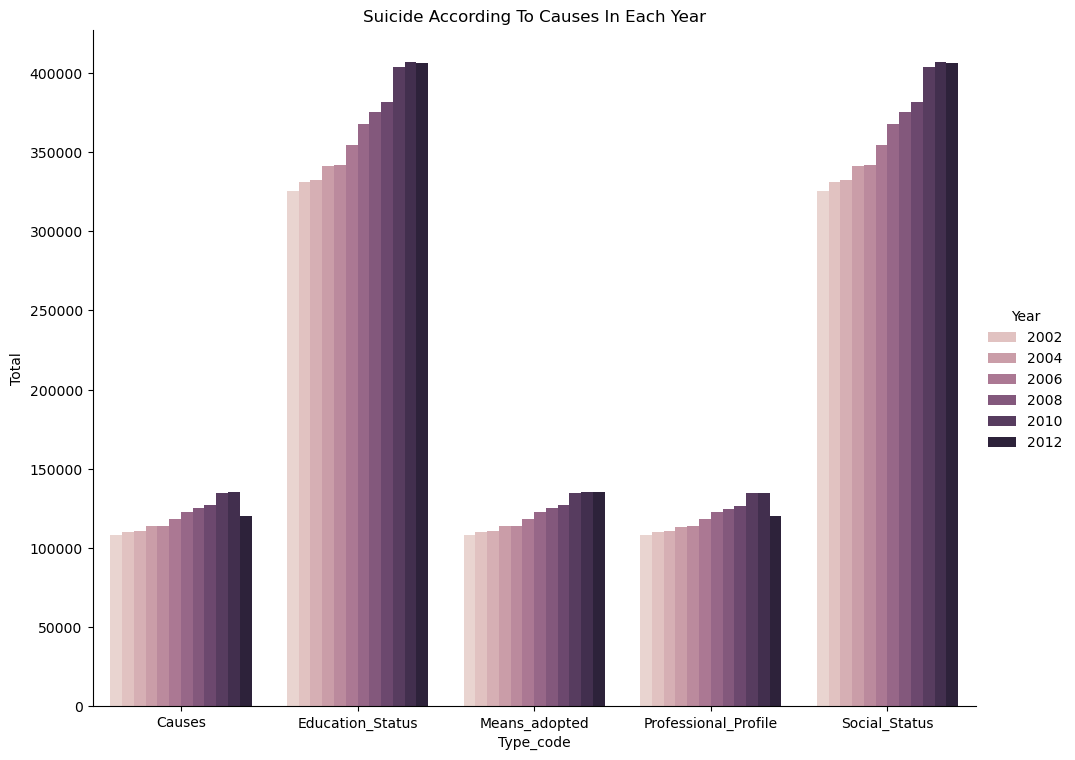

In [12]:
filter_type_code = pd.DataFrame(df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

## Q.4 Suicide According To Gender

Gender
Male      118879
Female    118640
Name: count, dtype: int64


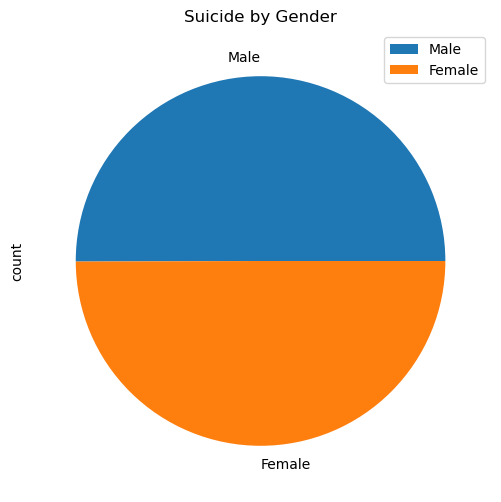

In [15]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

## Q. Suicides By The Educational Background

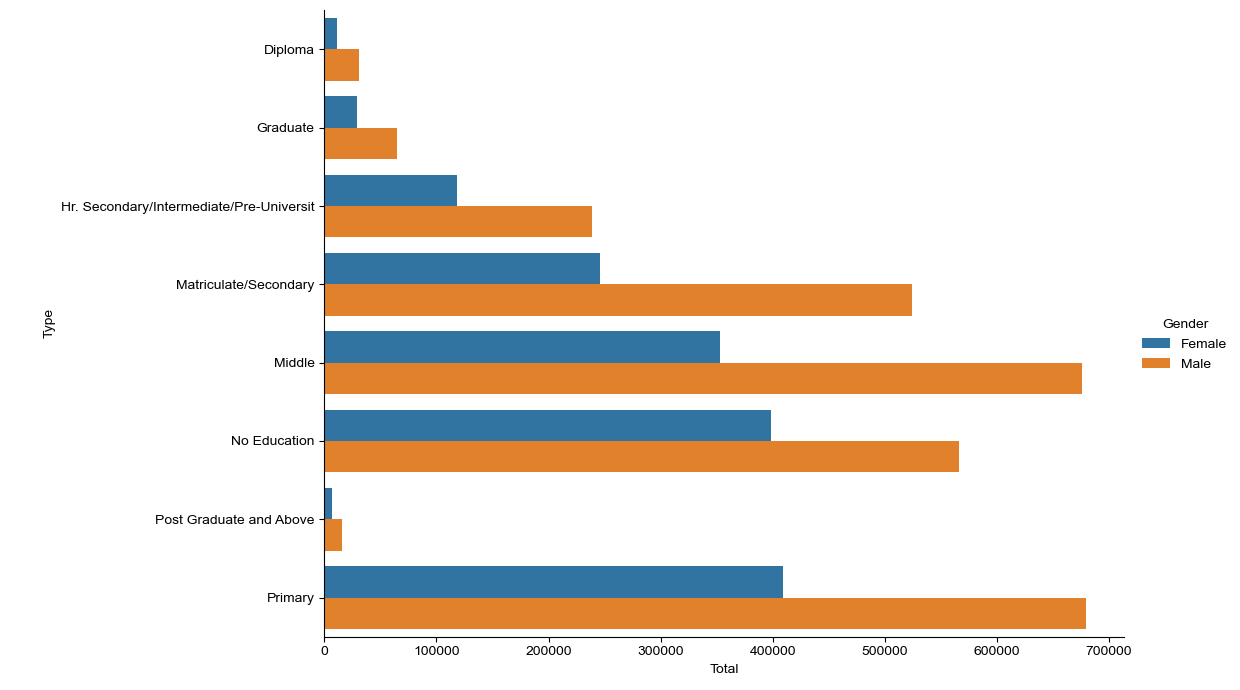

In [18]:
#filtering the data as per the educational background
education_status = pd.DataFrame(df[df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7);
sns.set_style('whitegrid');

## Q.Suicides By Social Status

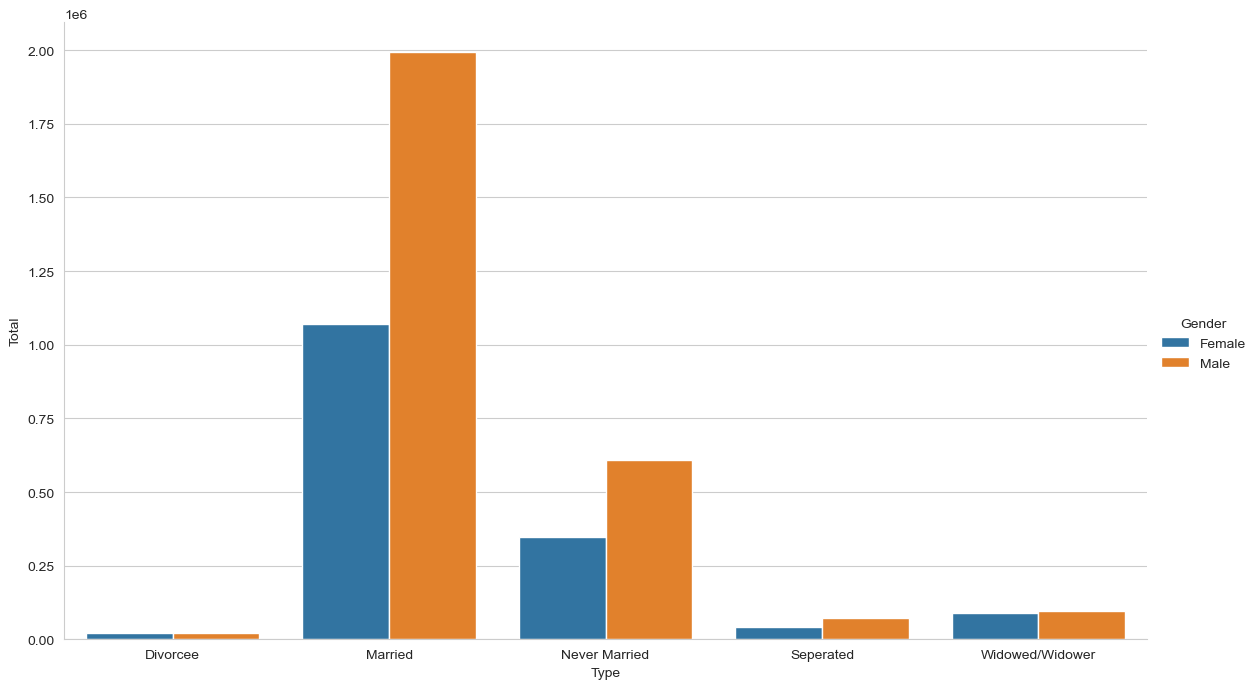

In [22]:
#filtering data according to the social status
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

#plotting the above data
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);

## Q.Suicides By Age Groups

Age_group
0-14     45027
15-29    45223
30-44    45193
45-59    45146
60+      45074
Name: count, dtype: int64


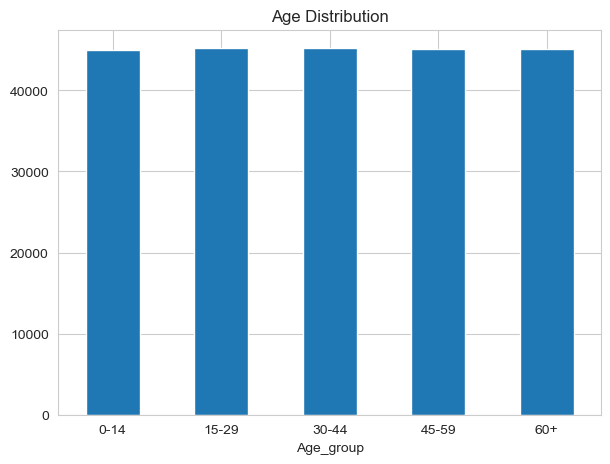

In [25]:
#Age Distributiion
statewise_Age_df = df.drop(df[df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

## People of which professional background has committed more suicides?

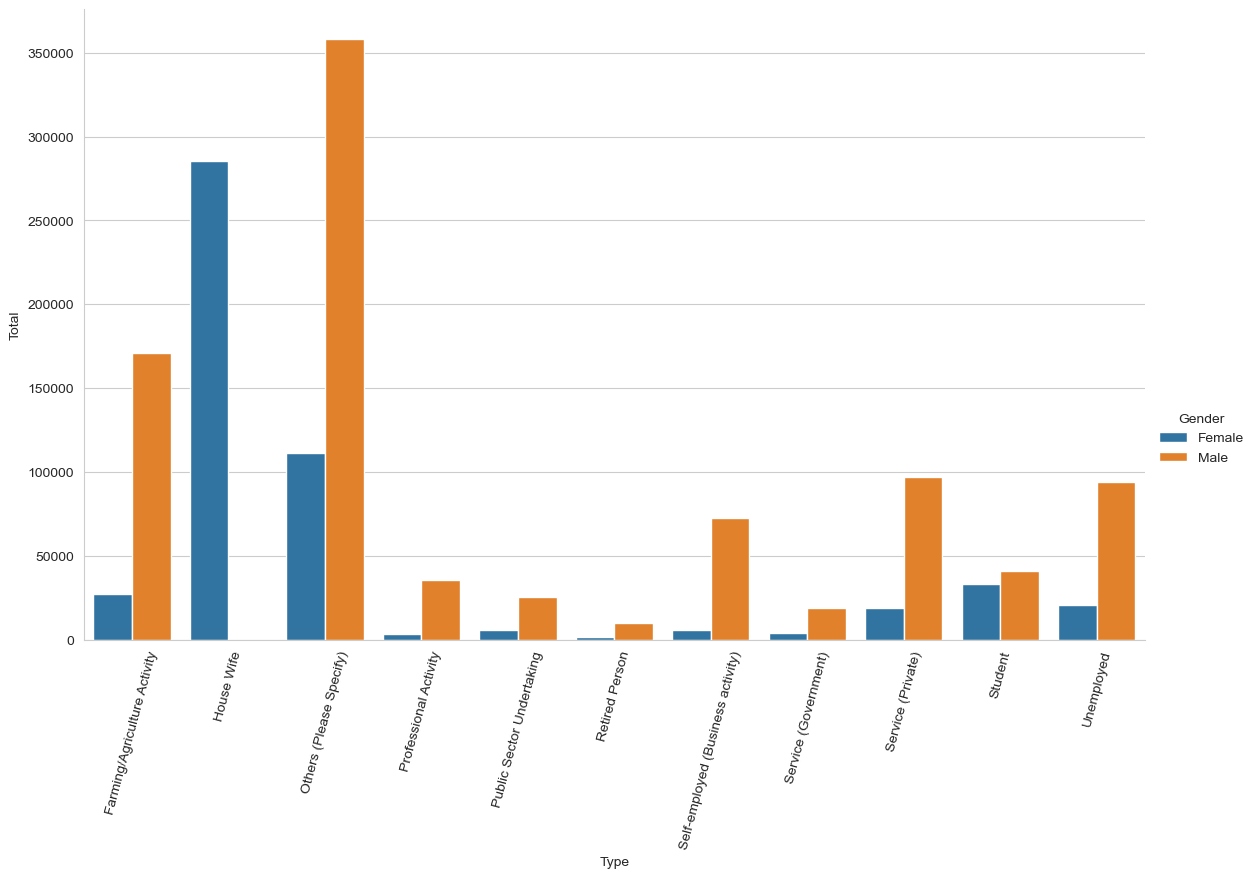

In [28]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7);
g.set_xticklabels(rotation=75);